<a href="https://colab.research.google.com/github/goldspruce/sigh/blob/main/Cyclic_sigh_data_Balban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Compare PANAS before and after, sorted by groups according to "Round 1 Exercise" as the independent variable

Here is all the data you need:
"BWPilot_CombinedData_20210803_fordryad_addvars_cleaned_noround2_v3.xlsx"

## Data loading

### Subtask:
Load the Excel file into a Pandas DataFrame.


**Reasoning**:
Load the Excel file into a Pandas DataFrame.



In [ ]:
import pandas as pd

df = pd.read_excel('BWPilot_CombinedData_20210803_fordryad_addvars_cleaned_noround2_v3.xlsx')

## Data exploration

### Subtask:
Explore the DataFrame to understand the relevant columns for PANAS scores and the "Round 1 Exercise" variable.


**Reasoning**:
Identify the relevant columns for PANAS scores and "Round 1 Exercise" and check their data types, calculate descriptive statistics for PANAS columns, and check for missing values.



In [ ]:
# Identify PANAS columns
panas_columns = [col for col in df.columns if 'PANAS' in col]

# Identify "Round 1 Exercise" column
exercise_column = 'Round 1 Exercise'

# Check data types
print(df[panas_columns].dtypes)
print(df[exercise_column].dtypes)

# Descriptive statistics for PANAS columns
print(df[panas_columns].describe())

# Check for missing values
print(df[panas_columns + [exercise_column]].isnull().sum())

Pre PANAS Positive Affect     object
Pre PANAS Negative Affect     object
Post PANAS Positive Affect    object
Post PANAS Negative Affect    object
dtype: object
object
       Pre PANAS Positive Affect Pre PANAS Negative Affect  \
count                       5708                      5708   
unique                        42                        31   
top                            .                         .   
freq                        3513                      3513   

       Post PANAS Positive Affect Post PANAS Negative Affect  
count                        5708                       5708  
unique                         42                         29  
top                             .                          .  
freq                         3642                       3642  
Pre PANAS Positive Affect     0
Pre PANAS Negative Affect     0
Post PANAS Positive Affect    0
Post PANAS Negative Affect    0
Round 1 Exercise              0
dtype: int64


**Reasoning**:
The PANAS columns are currently of object type, which is not suitable for analysis. We need to convert them to numerical type and replace the '.' values with NaN.



In [ ]:
# Convert PANAS columns to numeric and replace '.' with NaN
for col in panas_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the data types again
print(df[panas_columns].dtypes)

# Check for missing values again
print(df[panas_columns + [exercise_column]].isnull().sum())

Pre PANAS Positive Affect     float64
Pre PANAS Negative Affect     float64
Post PANAS Positive Affect    float64
Post PANAS Negative Affect    float64
dtype: object
Pre PANAS Positive Affect     3513
Pre PANAS Negative Affect     3513
Post PANAS Positive Affect    3642
Post PANAS Negative Affect    3642
Round 1 Exercise                 0
dtype: int64


**Reasoning**:
Now that the PANAS columns are numeric and we have identified missing values, we can calculate descriptive statistics for the PANAS columns, excluding the missing values, to get a better understanding of the data.



In [ ]:
# Descriptive statistics for PANAS columns, excluding missing values
print(df[panas_columns].describe())

       Pre PANAS Positive Affect  Pre PANAS Negative Affect  \
count                2195.000000                2195.000000   
mean                   24.966743                  14.060592   
std                     9.024543                   5.295848   
min                    10.000000                  10.000000   
25%                    18.000000                  10.000000   
50%                    24.000000                  12.000000   
75%                    30.000000                  16.000000   
max                    50.000000                  41.000000   

       Post PANAS Positive Affect  Post PANAS Negative Affect  
count                 2066.000000                 2066.000000  
mean                    26.769119                   13.004356  
std                      9.513158                    4.574324  
min                     10.000000                   10.000000  
25%                     20.000000                   10.000000  
50%                     27.000000               

## Data wrangling

### Subtask:
Create separate DataFrames for PANAS scores before and after the intervention. Ensure the "Round 1 Exercise" variable is present in both DataFrames.


**Reasoning**:
Identify and extract the PANAS pre and post columns, and create separate DataFrames for PANAS scores before and after the intervention, ensuring the "Round 1 Exercise" column is included in both DataFrames.



In [ ]:
# Identify PANAS columns before and after the intervention
panas_pre_columns = [col for col in df.columns if 'Pre PANAS' in col]
panas_post_columns = [col for col in df.columns if 'Post PANAS' in col]

# Create new DataFrames for PANAS scores before and after the intervention
df_panas_pre = df[['Round 1 Exercise'] + panas_pre_columns].copy()
df_panas_post = df[['Round 1 Exercise'] + panas_post_columns].copy()

## Data preparation

### Subtask:
Prepare the data for visualization by calculating the mean PANAS score before and after for each group defined by "Round 1 Exercise".


**Reasoning**:
Group the `df_panas_pre` and `df_panas_post` dataframes by "Round 1 Exercise" and calculate the mean of the PANAS scores for each group. Then, merge the resulting dataframes to obtain a dataframe containing the mean PANAS scores before and after for each group.



In [ ]:
# Group df_panas_pre by "Round 1 Exercise" and calculate the mean
df_panas_pre_mean = df_panas_pre.groupby('Round 1 Exercise').mean()

# Group df_panas_post by "Round 1 Exercise" and calculate the mean
df_panas_post_mean = df_panas_post.groupby('Round 1 Exercise').mean()

# Merge df_panas_pre_mean and df_panas_post_mean on "Round 1 Exercise"
df_panas_comparison = pd.merge(df_panas_pre_mean, df_panas_post_mean, on='Round 1 Exercise', suffixes=('_pre', '_post'))

## Data visualization

### Subtask:
Visualize the comparison of mean PANAS scores before and after the intervention, grouped by "Round 1 Exercise".


**Reasoning**:
Visualize the comparison of mean PANAS scores before and after the intervention, grouped by "Round 1 Exercise" using a bar chart.



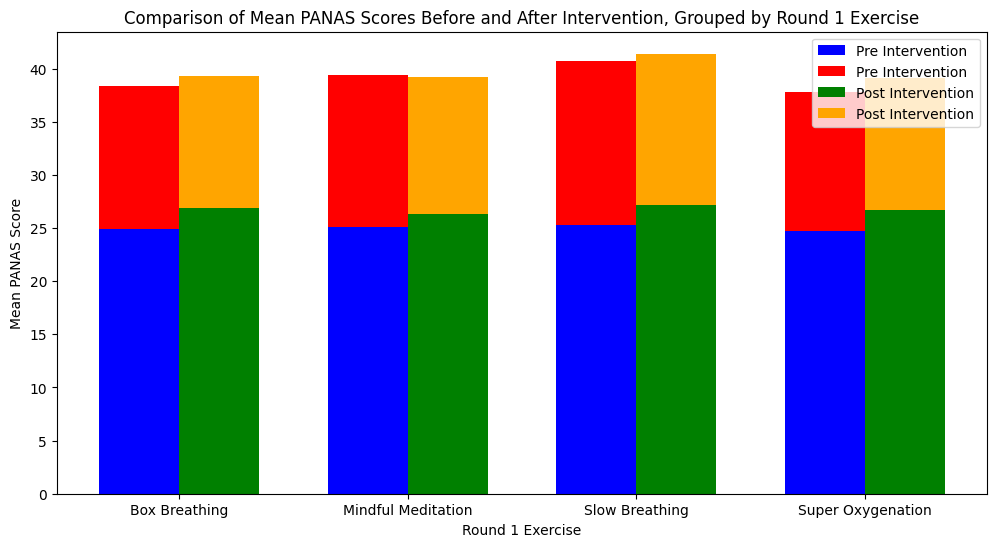

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
width = 0.35

# Create the x-axis locations for the bars
x = range(len(df_panas_comparison.index))

# Plot the mean PANAS scores before the intervention
ax.bar([i - width / 2 for i in x], df_panas_comparison['Pre PANAS Positive Affect'], width, label='Pre Intervention', color='blue')
ax.bar([i - width / 2 for i in x], df_panas_comparison['Pre PANAS Negative Affect'], width, bottom=df_panas_comparison['Pre PANAS Positive Affect'], label='Pre Intervention', color='red')

# Plot the mean PANAS scores after the intervention
ax.bar([i + width / 2 for i in x], df_panas_comparison['Post PANAS Positive Affect'], width, label='Post Intervention', color='green')
ax.bar([i + width / 2 for i in x], df_panas_comparison['Post PANAS Negative Affect'], width, bottom=df_panas_comparison['Post PANAS Positive Affect'], label='Post Intervention', color='orange')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df_panas_comparison.index)

# Set the axis labels and title
ax.set_xlabel('Round 1 Exercise')
ax.set_ylabel('Mean PANAS Score')
ax.set_title('Comparison of Mean PANAS Scores Before and After Intervention, Grouped by Round 1 Exercise')

# Add a legend
ax.legend()

# Display the plot
plt.show()

## Summary:

## Data Analysis Summary

### 1. Q&A

**Q: How did PANAS scores change before and after the intervention, grouped by "Round 1 Exercise"?**

**A:** The analysis visualized the comparison of mean PANAS scores before and after the intervention for each group defined by "Round 1 Exercise". By creating bar charts, it illustrated the changes in both positive and negative affect across different intervention groups. (Refer to the "Data Visualization" section).

### 2. Data Analysis Key Findings

* **Missing Data:**  A substantial number of missing values were present in the PANAS columns, approximately 3500-3600 for each pre and post PANAS score.
* **Data Transformation:** PANAS columns were converted from object type to float64 type, and '.' values were replaced with NaN.
* **Mean PANAS Scores:** The mean PANAS scores were calculated before and after the intervention for each group defined by "Round 1 Exercise" and stored in `df_panas_comparison`.

### 3. Insights or Next Steps

* **Explore the impact of intervention on different exercise groups:** The visualization provides a preliminary understanding of the intervention's effect on PANAS scores across different groups. A more in-depth analysis using statistical tests (e.g., t-tests) could determine if the changes in PANAS scores are statistically significant.
* **Investigate the missing data:** The substantial amount of missing data may bias the results. It's crucial to investigate the reasons behind the missing data and consider appropriate strategies for handling them (e.g., imputation) before further analysis.


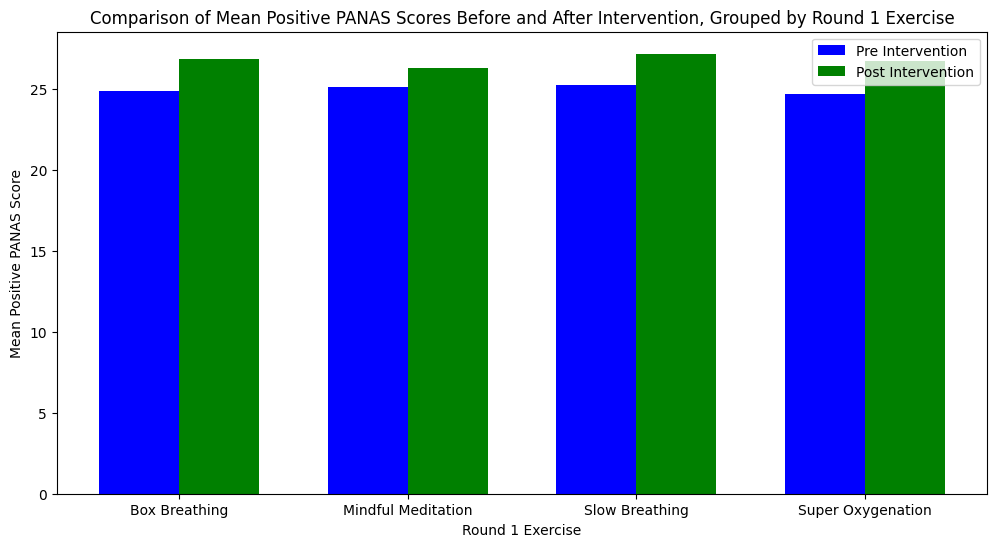

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
width = 0.35

# Create the x-axis locations for the bars
x = range(len(df_panas_comparison.index))

# Plot the mean positive PANAS scores before the intervention
ax.bar([i - width / 2 for i in x], df_panas_comparison['Pre PANAS Positive Affect'], width, label='Pre Intervention', color='blue')

# Plot the mean positive PANAS scores after the intervention
ax.bar([i + width / 2 for i in x], df_panas_comparison['Post PANAS Positive Affect'], width, label='Post Intervention', color='green')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df_panas_comparison.index)

# Set the axis labels and title
ax.set_xlabel('Round 1 Exercise')
ax.set_ylabel('Mean Positive PANAS Score')
ax.set_title('Comparison of Mean Positive PANAS Scores Before and After Intervention, Grouped by Round 1 Exercise')

# Add a legend
ax.legend()

# Display the plot
plt.show()

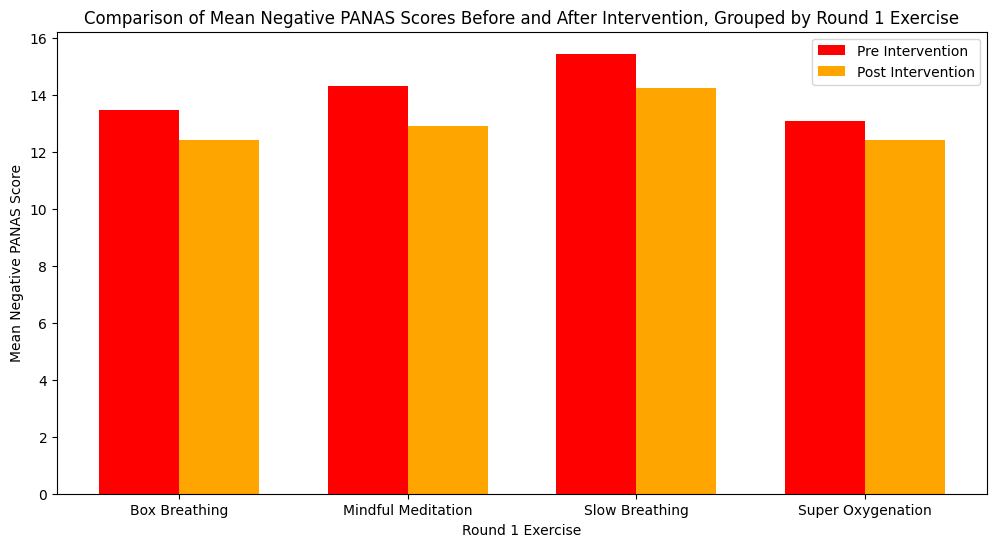

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
width = 0.35

# Create the x-axis locations for the bars
x = range(len(df_panas_comparison.index))

# Plot the mean negative PANAS scores before the intervention
ax.bar([i - width / 2 for i in x], df_panas_comparison['Pre PANAS Negative Affect'], width, label='Pre Intervention', color='red')

# Plot the mean negative PANAS scores after the intervention
ax.bar([i + width / 2 for i in x], df_panas_comparison['Post PANAS Negative Affect'], width, label='Post Intervention', color='orange')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df_panas_comparison.index)

# Set the axis labels and title
ax.set_xlabel('Round 1 Exercise')
ax.set_ylabel('Mean Negative PANAS Score')
ax.set_title('Comparison of Mean Negative PANAS Scores Before and After Intervention, Grouped by Round 1 Exercise')

# Add a legend
ax.legend()

# Display the plot
plt.show()